*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/yqtl_association_with_advb.ipynb)*

# Yiqṭol and Its Association with Prototypical Adverbs
### Cody Kingham 
<a href="../../docs/sponsors.md"><img height=200px width=200px align='left' src="../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Thu 27 Feb 2020 10:58:59 GMT


## Why does yiqṭol prefer particles?

In [a preliminary analysis](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/archive/2019-10-31/analysis/exploratory/construction_clusters.ipynb), we found evidence that the yiqṭol verb tends to be attracted to time words which can be considered "prototypical adverbs". These are words which are infrequently combined with constructions that indicate number, definiteness, or possession (see Croft, "A Conceptual Frameowork for Grammatical Categories," 1990). These prototypical adverbs include words such as אז ,נצח ,עולם ,מתי ,עתה. In [the study on parts of speech](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/time_distribution_and_pos.ipynb), we found an empirical basis for separating these words from their noun counterparts on the grounds of their collocability with nominalizing constructions.

The preliminary analysis cited above found a statistical association between yiqṭol and prototypical adverbs. **In this notebook, we seek to confirm that yiqṭol indeed has a preference for these adverb terms, and we ask why?**

### Why does it matter?

One of the surprising things about this pattern, as this notebook will demonstrate, is that not all of the yiqṭol adverbs seem to fit the same semantic mold. For instance, the semantics of אז, which refers to a point in time, is different from עולם, which refers to a unknown duration. And yet, these words share two major qualities: they are both adverb-like, and they both seem to prefer the yiqṭol verb (as we will seek to confirm). This is surprising because we might assume that yiqṭol's preference is primarily semantic in nature: durational terms such as עולם and נצח would fit the widely-agreed, unbounded meaning of the verbal form. But אז suggests another possibility: that yiqṭol's preference is not wholly predictable from its semantics, but possibly due to a convention of use. Or, in other words, it is simply an idiosyncratic quality of yiqṭol to easily combine with adverbs. This would not mean such behavior has *no* semantic motivation. Perhaps the association of yiqṭol with durational adverbs opened the door for an association with adverbs in general. **These questions are purely hypothetical. And in this notebook we will seek to find empirical data that can help (in)validate these hypotheses and suggest further directions for analysis.**

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# standard packages
from pathlib import Path
import collections
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.serif'] = ['SBL Biblit']
import seaborn as sns
from bidi.algorithm import get_display # bi-directional text support for plotting
from scipy.stats import linregress

# custom package in /tools
from paths import main_table, figs
from tf_tools.load import load_tf
from tf_tools.tokenizers import tokenize_surface
from cx_analysis.load import cxs
from cx_analysis.search import SearchCX
from stats.significance import contingency_table, apply_fishers
from stats.pca import apply_pca

TF, API, A = load_tf(silent='deep')
A.displaySetup(condenseType='phrase')
F, E, T, L = A.api.F, A.api.E, A.api.T, A.api.L
se = SearchCX(A)
phrase2cxs = cxs['phrase2cxs']
class2cx = cxs['class2cx']
time_cxs = list(phrase2cxs.values())

# configure data output
name = 'yqtl_association_with_advb'
figures = figs.joinpath(name)
if not figures.exists():
    figures.mkdir(parents=True)
def fg_path(fg_name):
    return figures.joinpath(fg_name)

In [3]:
# set up project dataset
times_full = pd.read_csv(main_table, sep='\t')
times_full.set_index(['node'], inplace=True)
times = times_full[~times_full.classi.str.contains('component')]

# Adverb Collocations with Yiqṭol

We pick up the thread where we left off in [the notebook on parts of speech](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/time_distribution_and_pos.ipynb). There we used Principal Component Analysis (PCA) to isolate prototypical adverbs from nouns. We duplicate that same method here and begin to look at the collocational tendencies of these items compared against verbs. 

In [4]:
# compile collocation table of time heads with nominalizing constructions
time_cols = pd.pivot_table(
    times, 
    index=['time'], 
    values=['time_pl', 'quantified', 'definite', 
            'demonstrative', 'ordinal', 'time_sffx',
            'bare', 'genitive'],
    aggfunc=np.sum
)

# sort on size
time_cols = time_cols.loc[time_cols.sum(1).sort_values(ascending=False).index]

# drop observations with < 5 total sample size
time_cols = time_cols[time_cols.sum(1) > 4]

# calculate ratio
time_col_ratio = time_cols.div(time_cols.sum(1), axis=0)

# apply PCA to dataset
time_pca, time_loadings = apply_pca(time_col_ratio, 0, 1, scree=False)

The results of the PCA analysis and its implications are explored and explained further in the notebook linked to above. The resulting PCA space is illustrated below, as calculated in that notebook.

<img src="../figures/time_distribution_and_pos/time_head_clusters.png" height=600px, width=600px>

The items to the right of the plot are the "adverb" group. We can select them by pulling all words with an x-axis value (principal component 1 or PC1) which is $> 0$. We can generalize and say that in this model terms which have a higher x-axis value are "more adverbial." Although, this categorization remains a working hypothesis. Those forms are shown below in descending order. Note that all words down to עתה have the same value of `0.59`.

In [5]:
advbs = time_pca[time_pca['PC1'] > 0].iloc[:, :2]
advbs = advbs.sort_values(by='PC1', ascending=False) # sort by distance from origin

advbs

,PC1,PC2
time,,
יומם,0.594544,0.016065
מתי,0.594544,0.016065
טרם,0.594544,0.016065
מהר,0.594544,0.016065
אן,0.594544,0.016065
מהרה,0.594544,0.016065
עד,0.594544,0.016065
שׁני,0.594544,0.016065
פתאם,0.594544,0.016065


By contrast, we can also select a list of nouns, which lie on the opposite end of the spectrum. We see that a few terms are clustered towards the center, such as ראשׁית and אחר. Since their classification is mixed, we will not select those. We will thus select all items which have $PC1 < -0.2$

In [6]:
nouns = time_pca[time_pca['PC1'] < -0.2].iloc[:, :2]
nouns = nouns.sort_values(by='PC1')

nouns

,PC1,PC2
time,,
ערב,-0.580466,0.626619
שׁבת,-0.569903,0.567700
צהרים,-0.544289,0.174998
מועד,-0.531623,0.261975
ראשׁון,-0.515870,0.677366
שׁבוע,-0.507633,-0.183260
פעם,-0.504261,-0.184201
רגל,-0.496096,-0.423423
תחלה,-0.492899,0.238149


## Compare Verb Tense Collocational Tendencies

We will now make a count of these two categories' collocational tendencies with certain verb tenses. We depend on the [BHSA's](https://github.com/ETCBC/bhsa) encoding of the verbs, which distinguish the following possible categories:

| name | tag |
| ---- | --- |
| qaṭal | qtl |
| yiqṭol| yqtl |
| wayyiqṭol | wyqtl |
| imperative | impv |
| participle | ptcp |
| infinitive | inf |

Note that the tense names/tags have been adapted from BHSA terms like "imperfect" to fit the more theory-neutral terminology. A further category has been added by this project's code, that of the `weqetal` (see the production code [here](../../data/bhsa/tenses.py)):

| name | tag | 
| ---  | --- |
| weqeṭal | wqtl |

For this analysis, we will focus on `qtl`, `yqtl`, `wyqtl`, `wqtl`, and `ptcp`, leaving aside the imperative and infinitives for now. We do not yet distinguish verb tenses on the basis of positionality or length (e.g. long versus short yiqṭol). 

### Calculate and compare tense tendencies with adverbs / nouns

First we build a table, `tense_cols` which contains tense collocation counts.

In [7]:
tense_cols_full = times.pivot_table(index=['time'], columns=['tense'], aggfunc='size').fillna(0) # get collocations
tense_cols = tense_cols_full[['qtl', 'wqtl', 'wyqtl', 'yqtl', 'ptcp',]] # select subset
tense_cols = tense_cols.loc[tense_cols.sum(1).sort_values(ascending=False).index] # sort by frequency
tense_ratios = tense_cols.divide(tense_cols.sum(1), axis=0) # get ratios
tense_fishers, tense_odds = apply_fishers(tense_cols, 0, 1) # Fisher's association scores

The top of the collocation dataset is shown below, with **raw counts**.

In [8]:
tense_cols.head()

tense,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
יום,318.0,96.0,257.0,329.0,89.0
עוד,42.0,8.0,48.0,198.0,24.0
שׁנה,97.0,11.0,66.0,36.0,3.0
עולם,23.0,19.0,6.0,77.0,9.0
עת,29.0,6.0,31.0,42.0,12.0


We also have a table which calculates the **ratio representation of each verb per time**, shown below:

In [9]:
tense_ratios.head()

tense,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
יום,0.292011,0.088154,0.235996,0.302112,0.081726
עוד,0.131250,0.025000,0.150000,0.618750,0.075000
שׁנה,0.455399,0.051643,0.309859,0.169014,0.014085
עולם,0.171642,0.141791,0.044776,0.574627,0.067164
עת,0.241667,0.050000,0.258333,0.350000,0.100000


The ratios alone tell us a verb's representation within a time's own occurrences, but it does not tell us how significant those values are with respect to a verb's overall frequency and co-occurrence with other times. For that we can use [Fisher's exact test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test), which is uniquely suited for non-normal distributions (as we see in natural language data) and datasets with values $< 5$. The Fisher's test returns a `p-value`, which we in turn transform with a $log_{10}$, following [Stefanowitsch and Gries 2003](https://www.researchgate.net/publication/37929828_Collostructions_Investigating_the_interaction_of_words_and_constructions). The null hypothesis that "there is no association between A and B" can be rejected when $p < 1.3$, that is $|\log_{10}0.05|$. We also add a positive or negative sign based on whether the observed frequency falls below the expected frequency, again following Stefanowitsch and Gries. The top of the **Fisher's Exact** table is shown below.

In [10]:
tense_fishers.head()

,qtl,wqtl,wyqtl,yqtl,ptcp
יום,1.586072,2.950021,1.045879,-9.452700,1.125428
עוד,-9.080649,-3.247572,-2.896506,19.778072,0.137591
שׁנה,9.001763,-0.401541,2.853509,-10.911849,-3.646659
עולם,-2.030842,2.674619,-7.666214,5.618482,0.000000
עת,-0.222696,-0.238904,0.508451,-0.200192,0.699389


### Separate "adverb" dataset from "noun" dataset

Now that we have a dataset with verb collocation data, we test whether there are strong tendencies for each group of words as identified by the PCA analysis. First we isolate the potential adverbs from the other times.

In [11]:
# adverbs
advb_tenses = tense_cols.loc[advbs.index]
advb_tenses = advb_tenses.loc[advb_tenses.sum(1).sort_values(ascending=False).index] # sort by N-observations
advb_ratio = tense_ratios.loc[advb_tenses.index] 
advb_fishers = tense_fishers.loc[advb_tenses.index]

# nouns
noun_tenses = tense_cols.loc[nouns.index]
noun_tenses = noun_tenses.loc[noun_tenses.sum(1).sort_values(ascending=False).index] # sort by N-observations
noun_ratio = tense_ratios.loc[noun_tenses.index] 
noun_fishers = tense_fishers.loc[noun_tenses.index]

Below is an exhaustive inventory of raw tense collocation counts for all of the "adverbs." 

In [12]:
advb_tenses

tense,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
עוד,42.0,8.0,48.0,198.0,24.0
עולם,23.0,19.0,6.0,77.0,9.0
אז,43.0,0.0,1.0,72.0,3.0
עתה,45.0,0.0,0.0,44.0,2.0
כן,11.0,0.0,21.0,18.0,0.0
תמיד,2.0,6.0,0.0,18.0,6.0
מחר,1.0,1.0,0.0,20.0,4.0
נצח,4.0,0.0,0.0,20.0,1.0
מחרת,0.0,0.0,21.0,2.0,0.0


The numbers are summarized below. For reference, `count` refers to number of non-zero observations. `25%` etc. refer to the percentile. The other values are self-explanatory.

In [13]:
advb_tenses.describe()

tense,qtl,wqtl,wyqtl,yqtl,ptcp
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,9.950000,2.150000,5.800000,27.500000,2.900000
std,15.271146,4.522168,11.954299,45.555634,5.485867
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,6.000000,0.000000
50%,3.000000,0.000000,0.000000,11.500000,1.000000
75%,6.500000,2.000000,4.500000,20.000000,3.000000
max,45.000000,19.000000,48.000000,198.000000,24.000000


The ratios are shown below:

In [14]:
advb_ratio

tense,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
עוד,0.131250,0.025000,0.150000,0.618750,0.075000
עולם,0.171642,0.141791,0.044776,0.574627,0.067164
אז,0.361345,0.000000,0.008403,0.605042,0.025210
עתה,0.494505,0.000000,0.000000,0.483516,0.021978
כן,0.220000,0.000000,0.420000,0.360000,0.000000
תמיד,0.062500,0.187500,0.000000,0.562500,0.187500
מחר,0.038462,0.038462,0.000000,0.769231,0.153846
נצח,0.160000,0.000000,0.000000,0.800000,0.040000
מחרת,0.000000,0.000000,0.913043,0.086957,0.000000


### Ratio across all "adverbs" (versus "nouns")

We can see in the summary below that the adverb group has a high proportion of yiqtol representation:

In [15]:
all_advb_tenses = advb_tenses.sum() / advb_tenses.sum().sum()

all_advb_tenses

tense
qtl      0.206004
wqtl     0.044513
wyqtl    0.120083
yqtl     0.569358
ptcp     0.060041
dtype: float64

Let's see how this compares against the "nouns" group.

In [16]:
all_noun_tenses = noun_tenses.sum() / noun_tenses.sum().sum()

all_noun_tenses

tense
qtl      0.286929
wqtl     0.085016
wyqtl    0.276833
yqtl     0.279490
ptcp     0.071732
dtype: float64

We get the difference between the two distributions:

In [17]:
noun_advb_difference = (all_advb_tenses - all_noun_tenses).abs()

noun_advb_difference

tense
qtl      0.080925
wqtl     0.040502
wyqtl    0.156750
yqtl     0.289868
ptcp     0.011691
dtype: float64

The biggest difference is the yiqtol's representation at ~30% more within the adverb group.

### "Adverbs" and Fisher's exact tests

The Fisher's scores for adverbs are show below. $1.3 < score < -1.3$ is statistically significant:

#### Association with any tense

In [18]:
advb_fishers

,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
עוד,-9.080649,-3.247572,-2.896506,19.778072,0.137591
עולם,-2.030842,2.674619,-7.666214,5.618482,0.000000
אז,1.586010,-3.301144,-11.248105,6.498397,-1.351648
עתה,5.521070,-2.606705,-9.760595,1.439333,-1.042144
כן,-0.282993,-1.331073,2.833125,-0.053707,-1.329310
תמיד,-2.117939,1.737141,-3.124449,1.380447,1.662020
מחר,-2.217454,0.000000,-2.525332,4.286143,0.977794
נצח,-0.578327,-0.387902,-2.537950,4.617990,0.000000
מחרת,-2.876783,-0.398917,11.758661,-2.416684,-0.395153


#### Associations with yiqtol

We select those scores where $score > 1.3$ for the yiqtol verb.

In [19]:
advb_yqtl_assoc = advb_fishers[advb_fishers['yqtl'] > 1.3].sort_values(by='yqtl', ascending=False)

advb_yqtl_assoc

,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
עוד,-9.080649,-3.247572,-2.896506,19.778072,0.137591
אז,1.586010,-3.301144,-11.248105,6.498397,-1.351648
עולם,-2.030842,2.674619,-7.666214,5.618482,0.000000
נצח,-0.578327,-0.387902,-2.537950,4.617990,0.000000
מחר,-2.217454,0.000000,-2.525332,4.286143,0.977794
מתי,-0.899719,-0.404130,-1.917864,3.687975,0.188855
עד,-1.549583,-0.208964,-1.301094,2.460708,1.154166
אן,-0.423193,-0.208964,-1.301094,2.460708,-0.000000
טרם,-0.132099,0.000000,-0.865613,2.452161,0.000000


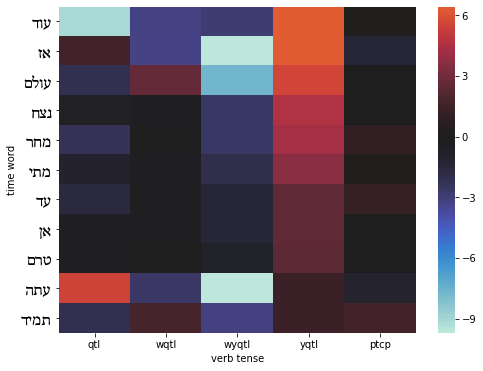

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = sns.heatmap(advb_yqtl_assoc, center=0, robust=True)
ax.set_yticklabels([get_display(t) for t in advb_yqtl_assoc.index], size=16, rotation=0, fontfamily='serif')
ax.set_ylabel('time word')
ax.set_xlabel('verb tense')
plt.show()

#### Disassociations with yiqtol

We select scores where $score < -1.3$. This means that the observed co-occurrence frequency is lower than would be expected in a random distribution.

In [21]:
advb_yqtl_dassoc =  advb_fishers[advb_fishers['yqtl'] < -1.3].sort_values(by='yqtl', ascending=False)

advb_yqtl_dassoc

,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
שׁני,-1.994594,0.987496,4.640552,-1.388484,-0.202828
מחרת,-2.876783,-0.398917,11.758661,-2.416684,-0.395153


Only two terms are marked as especially disassociated with the verb: שני and מחרת. We see that both are statistically attracted to wayyiqtol. And likewise disassociated with qatal. There is no statistically significant values for participles and weqatals. 

#### Neutral scores with respect to yiqtol

What terms are neutral to the yiqtol? i.e. they are neither associated nor disassociated.

In [22]:
advb_yqtl_neut = advb_fishers[(advb_fishers['yqtl'] < 1.3) & (advb_fishers['yqtl'] > -1.3)].sort_values(by='yqtl', ascending=False)

advb_yqtl_neut

,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
רגע,0.302056,0.000000,-0.865613,0.941003,0.000000
פתאם,-0.089793,0.000000,-0.096298,0.713563,0.000000
יומם,0.109501,0.000000,-0.656254,0.506937,0.000000
מהרה,0.000000,0.921577,-0.000000,0.000000,0.000000
הנה,0.534929,0.000000,-0.234763,0.000000,0.596753
כן,-0.282993,-1.331073,2.833125,-0.053707,-1.329310
מהר,1.056650,1.117225,-0.445077,-0.573658,0.000000


Some of these terms refer to suddenness: מהר, מהרה, פתאם. Others refer to positions in time like רגע. We also see יומם. 

We do not see any terms that refer to extended durations or open ended/unknown times, as we did with those that are attracted to yiqtol. 

### "Noun" associations with yiqtol

In [23]:
noun_fishers

,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
יום,1.586072,2.950021,1.045879,-9.452700,1.125428
שׁנה,9.001763,-0.401541,2.853509,-10.911849,-3.646659
עת,-0.222696,-0.238904,0.508451,-0.200192,0.699389
לילה,-0.507048,-0.497665,10.457816,-7.354929,0.488659
בקר,-7.399966,0.175056,9.841146,-0.821145,-0.079382
ערב,-2.766337,7.771832,-0.250691,0.094592,-0.627759
פעם,-0.125087,1.093670,0.913084,-0.834382,-0.236854
חדשׁ,0.472044,0.000000,1.013502,-1.885576,0.134547
מות,0.092548,0.000000,1.876936,-0.952690,-0.403455


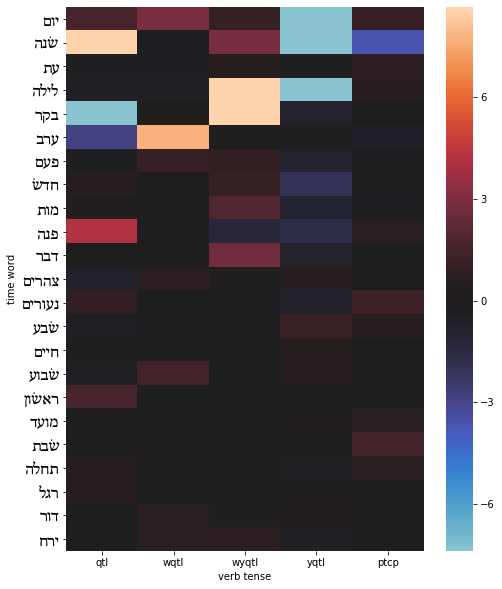

In [24]:
fig = plt.figure(figsize=(8, 10))
ax = sns.heatmap(noun_fishers, center=0, robust=True)
ax.set_yticklabels([get_display(t) for t in noun_fishers.index], size=16, rotation=0, fontfamily='serif')
ax.set_ylabel('time word')
ax.set_xlabel('verb tense')
plt.show()

<hr>

## Scatter Plots of Variables

### PC1 versus Yiqṭol

I'm curious to test whether distance along PC1 space correlates with frequency of use with the yiqṭol verb. We will make a scatter plot of the two values to see if there's any noticeable trend.

In [25]:
pc1_and_yqtl = pd.concat([tense_ratios['yqtl'], time_pca['PC1']], axis=1, sort=True).dropna()

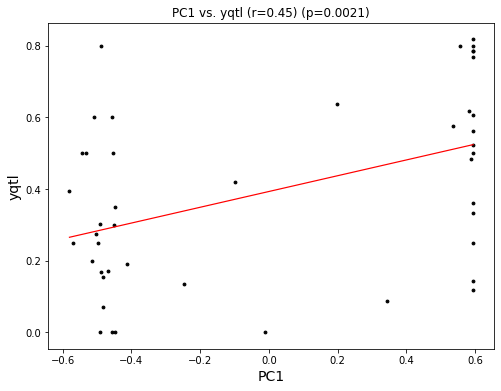

In [26]:
x, y = pc1_and_yqtl['PC1'], pc1_and_yqtl['yqtl']
slope, intercept, r, p, std_err = linregress(x,y)
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('PC1', size=14)
ax.set_ylabel('yqtl', size=14)
ax.scatter(x=x, y=y, color='black', s=8)

# plot regression line
r_x = np.unique(x.values) # avoid duplicate points
r_y = slope*r_x+intercept
ax.plot(r_x, r_y, color='red', linewidth=1.2)

ax.set_title(f'PC1 vs. yqtl (r={round(r, 2)}) (p={round(p, 4)})')
plt.show()

We do see a trend for more yiqtol representation in times that are further along the first principle component. Despite there being some exceptions, our $p=0.00021$ shows the correlation to be significant.

This correlation is important because it potentially shows another distinguishing feature of these "adverb" time words: **they are not only distinguished by their use without nominalizing constructions, they are also distinguished by their preference for the yiqtol verb form.** This confirms the data we have already seen in the dominant proportional representation of yiqtol in this group, as well as in the Fisher's exact scores.

### Time construction co-occurrence preferences versus yiqtol

We dig down a little bit deeper. Can we corroborate the principle component analysis by looking at word tendencies throughout the various constructions? 

For this analysis, for every time word, we take the ratio of its co-occurrence with nominalizing constructions and its ratio of tense co-occurrences. We want to answer: **Are times that occur more/less often with construction X more/less likely to co-occur with the yiqtol**?

We then build a separate scatter plot for each one to see whether there is a negative or positive correlation.

In [27]:
sample = time_cols[time_cols.sum(1) > 10]
sample_tenses = tense_ratios.loc[sample.index]
sample_cols = time_col_ratio.loc[sample.index]

In [28]:
do_cxs = [
    'definite', 'demonstrative', 
    'quantified', 'time_pl', 'genitive',
    'bare',
]

nom_yiq_dataset = {}

for cx in do_cxs:
    cx_data = sample_cols[cx]
    tense_data = sample_tenses['yqtl']
    tense_and_cx = pd.concat([cx_data, tense_data], sort=False, axis=1).fillna(0)
    tense_and_cx = tense_and_cx[(tense_and_cx > 0).any(1)] # prune null counts
    nom_yiq_dataset[cx] = tense_and_cx

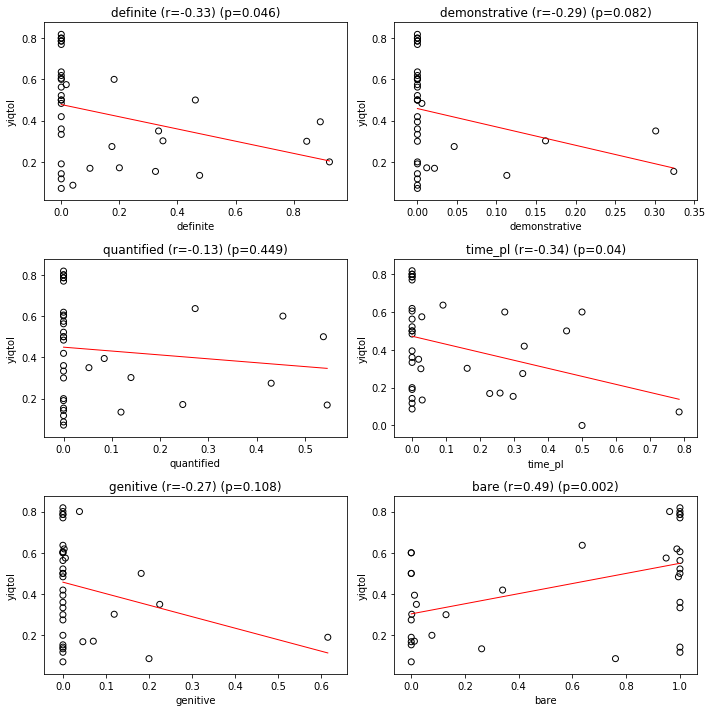

In [29]:
fig = plt.figure(figsize=(10,10))

for i, data in enumerate(nom_yiq_dataset.items()):
    
    # axes + linear regression analysis
    cx, df = data
    x, y =  df[cx], df['yqtl']
    slope, intercept, r, p, std_err = linregress(x,y)
    
    # make plot
    ax = fig.add_subplot(3, 2, i+1)
    ax.scatter(x, y, color='', edgecolor='black')
    ax.set_ylabel('yiqtol')
    ax.set_xlabel(f'{cx}')
    ax.set_title(f'{cx} (r={round(r, 2)}) (p={round(p, 3)})')
    
    # plot regression line
    rx = np.unique(x.values)
    ry = slope*rx+intercept
    ax.plot(rx, ry, 'red', linewidth=1)

    
fig.tight_layout()
plt.savefig(fg_path('yqtl_nominalizers_scatter.png'), dpi=300, bbox_inches='tight')
plt.show()

The graphs show the strongest effect in the `bare` category ($p=0.002$). This is essentially a reproduction of the principle component analysis results, which was based on these same features together. 

The graph is likewise very similar to the yiqtol and PC1 plot above. We do not see nearly as much as an effect with any of the other time words.

## Collocation with Nominalizing Constructions

Up to this point we have compared the behavior of time words against their co-occurrence with yiqtol. We've also shown that "adverb" words which are distinguished by a preference for bare constructions are likewise distinguished by their preference for yiqtol.

Up until now we have been able to find any strong effects when yiqtol is paired with the nominalizing constructions themselves. So now we will attempt to measure this directly. We ask: **Is the yiqtol more or less likely to occur in the presence of a nominalizing construction?** Remember that for our purposes here we define a "nominalizing construction" as any construction which communicates definiteness, quantity, or posession.

To answer the research question, we first compose tables of collocations between all verb tenses and these various constructions. We build two datasets:

1. yiqtol collocations with nominalizers for all time words
2. yiqtol collocations with nominalizers for noun words

We make the second table to see whether yiqtol has any suppressive effect on nominalizers even amongst noun-like terms.

## Fisher's 

In [30]:
noun_data = times[times.time.isin(nouns.index)]

In [31]:
# compile collocation table of time heads with nominalizing constructions
noms = [
    'time_pl', 'quantified', 'definite', 
    'demonstrative', 'ordinal', 'time_sffx',
    'bare', 'genitive'
]
exclude_verbs = ['infa','infc','impv']

verb_nom_cols = pd.pivot_table(
    times, 
    index=['tense'], 
    values=noms,
    aggfunc=np.sum
).drop(exclude_verbs)

verb_nom_ratios = verb_nom_cols.div(verb_nom_cols.sum(1), axis=0)

verb_nom_cols_nouns = pd.pivot_table(
    noun_data, 
    index=['tense'], 
    values=noms,
    aggfunc=np.sum
).drop(exclude_verbs)

verb_nom_ratios_nouns = verb_nom_cols_nouns.div(verb_nom_cols_nouns.sum(1), axis=0)

In [32]:
verb_nom_cols

,bare,definite,demonstrative,genitive,ordinal,quantified,time_pl,time_sffx
tense,,,,,,,,
ptcp,70.0,95.0,16.0,28.0,4.0,18.0,22.0,10.0
qtl,230.0,274.0,130.0,108.0,21.0,162.0,169.0,52.0
wqtl,45.0,98.0,38.0,21.0,16.0,48.0,44.0,5.0
wyqtl,136.0,315.0,163.0,57.0,40.0,165.0,134.0,8.0
yqtl,579.0,275.0,98.0,120.0,35.0,155.0,156.0,43.0


We also have calculated ratios across the verbs:

In [33]:
verb_nom_ratios

,bare,definite,demonstrative,genitive,ordinal,quantified,time_pl,time_sffx
tense,,,,,,,,
ptcp,0.266160,0.361217,0.060837,0.106464,0.015209,0.068441,0.083650,0.038023
qtl,0.200698,0.239092,0.113438,0.094241,0.018325,0.141361,0.147469,0.045375
wqtl,0.142857,0.311111,0.120635,0.066667,0.050794,0.152381,0.139683,0.015873
wyqtl,0.133595,0.309430,0.160118,0.055992,0.039293,0.162083,0.131631,0.007859
yqtl,0.396304,0.188227,0.067077,0.082136,0.023956,0.106092,0.106776,0.029432


And now the nouns raw counts along with those ratios:

In [34]:
verb_nom_cols_nouns

,bare,definite,demonstrative,genitive,ordinal,quantified,time_pl,time_sffx
tense,,,,,,,,
ptcp,6.0,92.0,16.0,22.0,4.0,18.0,20.0,7.0
qtl,9.0,266.0,128.0,97.0,21.0,160.0,146.0,31.0
wqtl,2.0,98.0,38.0,20.0,16.0,48.0,44.0,5.0
wyqtl,21.0,307.0,163.0,48.0,39.0,164.0,128.0,2.0
yqtl,14.0,267.0,98.0,112.0,35.0,152.0,145.0,30.0


In [35]:
verb_nom_cols_nouns.sum(1)

tense
ptcp     185.0
qtl      858.0
wqtl     271.0
wyqtl    872.0
yqtl     853.0
dtype: float64

In [36]:
verb_nom_ratios_nouns

,bare,definite,demonstrative,genitive,ordinal,quantified,time_pl,time_sffx
tense,,,,,,,,
ptcp,0.032432,0.497297,0.086486,0.118919,0.021622,0.097297,0.108108,0.037838
qtl,0.010490,0.310023,0.149184,0.113054,0.024476,0.186480,0.170163,0.036131
wqtl,0.007380,0.361624,0.140221,0.073801,0.059041,0.177122,0.162362,0.018450
wyqtl,0.024083,0.352064,0.186927,0.055046,0.044725,0.188073,0.146789,0.002294
yqtl,0.016413,0.313013,0.114889,0.131301,0.041032,0.178195,0.169988,0.035170


#### Fisher's with All

In [37]:
verb_nom_cols_fishers, verb_nom_cols_odds = apply_fishers(verb_nom_cols, 0, 1)

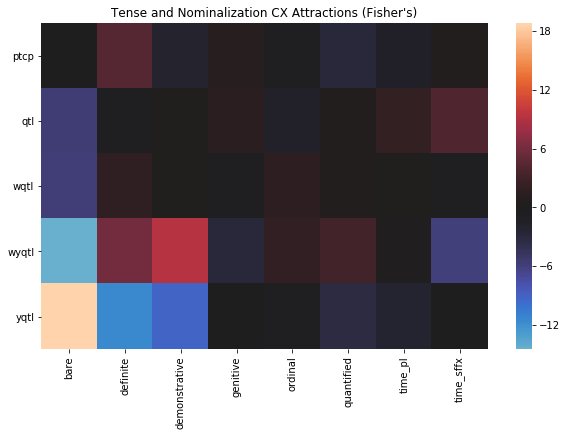

,bare,definite,demonstrative,genitive,ordinal,quantified,time_pl,time_sffx
ptcp,0.216257,4.310509,-1.898352,1.004249,-0.608345,-2.905765,-1.465743,0.480639
qtl,-5.696297,-0.578581,0.470195,1.463110,-1.585244,0.701815,2.123012,4.068389
wqtl,-5.847795,1.903499,0.407863,-0.348523,1.748134,0.650088,0.371790,-0.669471
wyqtl,-24.866029,5.841989,9.227546,-2.868435,1.947325,3.129008,0.319661,-6.017748
yqtl,52.951454,-11.579542,-9.080085,0.198931,-0.490212,-3.202115,-2.026363,0.157499


In [38]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(verb_nom_cols_fishers, center=0, robust=True)
ax.set_yticklabels(verb_nom_cols_fishers.index, rotation=0)
plt.savefig(fg_path('tense_nominalizer_attractions.png'), dpi=300, bbox_inches='tight')
plt.title('Tense and Nominalization CX Attractions (Fisher\'s)')
plt.show()
display(verb_nom_cols_fishers)

#### Fisher's with Nouns

In [39]:
verb_nom_cols_noun_fishers, verb_nom_cols_noun_fishers_odds = apply_fishers(verb_nom_cols_nouns, 0, 1)

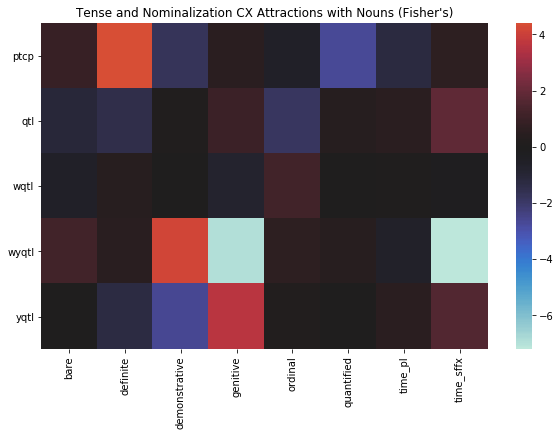

,bare,definite,demonstrative,genitive,ordinal,quantified,time_pl,time_sffx
ptcp,0.885046,5.225427,-1.754517,0.508401,-0.497181,-2.689945,-1.214842,0.658108
qtl,-1.058381,-1.432190,0.135365,1.040818,-1.825892,0.335751,0.529877,1.873481
wqtl,-0.494454,0.376731,-0.067037,-0.780645,1.186854,0.000000,0.064538,-0.167345
wyqtl,1.190227,0.481056,4.174352,-6.912510,0.681043,0.427535,-0.601965,-8.221176
yqtl,0.000000,-1.216822,-2.617974,3.621479,0.224114,0.000000,0.530479,1.581263


In [40]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(verb_nom_cols_noun_fishers, center=0, robust=True)
ax.set_yticklabels(verb_nom_cols_noun_fishers.index, rotation=0)
plt.savefig(fg_path('tense_nominalizer_attractions_nouns.png'), dpi=300, bbox_inches='tight')
plt.title('Tense and Nominalization CX Attractions with Nouns (Fisher\'s)')
plt.show()
display(verb_nom_cols_noun_fishers)

Looking at the associations for yqtl, we can make note of two collocations which are statistically significant $(-1.3 > attraction > 1.3)$:

* yiqtol with a genitive (i.e. construct) relation on the time word ($a=3.6$)
* yiqtol with a pronominal suffix on the time word ($a=1.6$)

We also can see a slight skew away from collocating with definiteness ($a=-1.21$), which falls just shy of the significance threshold. The demonstrative relation, however, is strongly disassociated with $a=-2.6$

Interestingly, yiqtol shares this quality with qatal, which exhibits significant association for the suffix ($a=1.9$) and higher association, though not meeting the significance threshold, with the genitive ($a=1.04$). 

Looking at the raw counts again, we can get a sense for the magnitude of the collocations:

In [41]:
verb_nom_cols_nouns

,bare,definite,demonstrative,genitive,ordinal,quantified,time_pl,time_sffx
tense,,,,,,,,
ptcp,6.0,92.0,16.0,22.0,4.0,18.0,20.0,7.0
qtl,9.0,266.0,128.0,97.0,21.0,160.0,146.0,31.0
wqtl,2.0,98.0,38.0,20.0,16.0,48.0,44.0,5.0
wyqtl,21.0,307.0,163.0,48.0,39.0,164.0,128.0,2.0
yqtl,14.0,267.0,98.0,112.0,35.0,152.0,145.0,30.0


Starting with the genitive: it has a frequency of $112$ when combined with yiqtol and $97$ with qatal, but only $48$ with wayyiqtol, $20$ with weqatal, and $22$ with participle.

The suffix, which has fewer occurrences, appears with yiqtol $30$ times, qatal $31$ times, but with wayyiqtol only $2$, weqetal $5$ and the participle $7$. 

**One hypothesis for the higher frequency of suffix with yiqtol is that it is caused by the yiqtol's more frequent use in the domain of discourse**. Within such contexts, suffixes, especially in second person, might be higher in general.

## ΔP Asymmetrical Tests

The Fisher's Exact test is symmetrical, meaning that the association between two variables is the same for each one. However, an asymmetrical significance test can reveal dependency of one variable on the other. To give a simple real-world example: the noun "blood" is likely to cue a word such as "red"; but "red" is likely to cue any number of nouns besides "blood". This shows that the co-occurrence relationship between the two forms is not symmetrical.

Following Ellis 2006, we can apply an assymetrical significance test to language data on the grounds the one construction would hypothetically serve as a cue, and the other as the response.

> $\begin{align}
\Delta P = P(O|C) - P(O|-C)\\
=\frac{a}{a+b} - \frac{c}{c+d}\\
=\frac{ad-bc}{(a+b)(c+d)}
\end{align}$

> "􏰁$\Delta P$ is the probability of the outcome given the cue $P(O|C)$ minus the probability of the outcome in the absence of the cue $P(O|–C)$. When these are the same, when the outcome is just as likely when the cue is present as when it is not, there is no covariation between the two events and 􏰁$P 1⁄4 0$. $􏰁P$ approaches $1.0$ as the presence of the cue increases the likelihood of the outcome and approaches $–1.0$ as the cue decreases the chance of the outcome—a negative association." -Ellis, "Language Acquisition," 2006, 11.

For our purposes here, we will model the time adverbial as the cue and the verb as the response. We want to answer **does an asymmetrical dependency between "adverbs" and yiqtol exist?**

#### Time as cue

Given a time, what is the likelihood that we observe a particular tense?

In [42]:
# unidirectional ΔP test
a,b,c,d,e = contingency_table(tense_cols, 0, 1) # get contingencies

time_cue = a / (a + b) - c / (c + d)

We look at the first 10 values.

In [43]:
time_cue.iloc[:10,:]

tense,qtl,wqtl,wyqtl,yqtl,ptcp
time,,,,,
יום,0.038117,0.032080,0.026754,-0.114814,0.017863
עוד,-0.152609,-0.047727,-0.077087,0.272182,0.005241
שׁנה,0.202009,-0.017236,0.097868,-0.222135,-0.060505
עולם,-0.100486,0.077577,-0.182228,0.208435,-0.003297
עת,-0.027073,-0.018394,0.041062,-0.026511,0.030915
אז,0.097532,-0.070442,-0.219152,0.239020,-0.046958
לילה,-0.048169,-0.030243,0.301096,-0.249445,0.026762
עתה,0.233904,-0.069767,-0.225718,0.111423,-0.049841
בקר,-0.230085,0.010427,0.312650,-0.077778,-0.015214


#### Verb as cue

Another flavor of the $\Delta P$ looks from the other direction, with the feature as the cue, in this case the verb tense. We calculate that below. To aid the comparison, we flip the axis so that the row always contains the cue.

In [44]:
# unidirectional ΔP test

verb_cue = (a / (a + c) - b / (b + d)).T

We look at the first 10 values.

In [45]:
verb_cue.iloc[:,:10]

time,יום,עוד,שׁנה,עולם,עת,אז,לילה,עתה,בקר,ערב
tense,,,,,,,,,,
qtl,0.044867,-0.073861,0.067662,-0.021771,-0.005278,0.018863,-0.008184,0.034929,-0.033993,-0.018619
wqtl,0.117333,-0.071777,-0.017939,0.052227,-0.011143,-0.042334,-0.015967,-0.032373,0.004787,0.079896
wyqtl,0.036103,-0.042772,0.037580,-0.045262,0.009178,-0.048591,0.058647,-0.038641,0.052953,-0.004931
yqtl,-0.112975,0.110121,-0.062197,0.037750,-0.004321,0.038644,-0.035429,0.013909,-0.009606,0.001899
ptcp,0.063051,0.007606,-0.060769,-0.002142,0.018074,-0.027233,0.013634,-0.022318,-0.006740,-0.015183


Inspecting the some of the values, we can see that the time adverbial seems to be more predictive of the verb than the verb is of the time adverbial. Here's an example with עוד.

### עוד as an example

We see that with time as the cue, the time עוד has a pretty strong score with yiqtol:

In [46]:
time_cue.loc['עוד']

tense
qtl     -0.152609
wqtl    -0.047727
wyqtl   -0.077087
yqtl     0.272182
ptcp     0.005241
Name: עוד, dtype: float64

This relationship is not completely symmetrical. The verb is a poorer predictor of עוד:

In [47]:
verb_cue.loc['yqtl']['עוד']

0.11012143241838356

Why is this the case? We can see it more clearly if we look at the ratios of yqtl representation in עוד versus the ratio across yqtl.

In [48]:
tense_cols['yqtl']['עוד'] / tense_cols['yqtl'].sum()

0.17491166077738515

In [49]:
tense_cols.loc['עוד']['yqtl'] / tense_cols.loc['עוד'].sum()

0.61875

עוד makes up $17\%$ of yiqtol's total. But yiqtol makes up $62\%$ of עוד's total. **The numbers suggest that עוד is more predictive of yiqtol than yiqtol is of עוד.**

### The overall predictive power of time for verb

We can get a sense for the overall predictive power for each test based on the cumulative mean of its absolute values.

Below we retrieve the mean association score accross the absolute value for the time as a cue.

In [50]:
time_cue.abs().mean().mean()

0.21081859098659791

And next we see the same value for the verb.

In [51]:
verb_cue.abs().mean().mean()

0.005877288199936625

**Based on this preliminary data, we can conclude that in general, the time adverbial is more predictive of a tense than a tense is for a given adverbial.** Intuitively this makes sense. There are far more time adverbials that can be chosen at any given moment, but there are far less verb tense choices. 

### TODO: Add comparisons between nouns/adverbs, see what these results mean for the issue of yiqtol/adverb dependency

## Manual Investigation

We export a series of spreadsheets for manually inspecting collocations.

### Co-occurrences "Adverbs" and yiqtols

In [52]:
advb_instances = times[(times.time.isin(advbs.index)) & (times.tense == 'yqtl')]

advb_inspect = advb_instances[['time', 'ref', 'clause', ]].sort_values(by=['time','node'])

advb_inspect.shape

(550, 3)

In [53]:
advb_inspect.to_csv('../tables/inspect/yqtl_adverbs.tsv', encoding='utf-16', sep='\t')

### Co-occurrences of "nouns" and yiqtols

In [54]:
noun_instances = times[(times.time.isin(nouns.index)) & (times.tense == 'yqtl')]

noun_inspect = noun_instances[['time', 'ref', 'clause', ]].sort_values(by=['time','node'])

noun_inspect.shape

(526, 3)

In [55]:
noun_inspect.to_csv('../tables/inspect/yqtl_nouns.tsv', encoding='utf-16', sep='\t')

<hr>